<h1>assunzioni globe</h1>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [3]:
ad_data = pd.read_excel('C:\\Users\\saver\\PycharmProjects\\Community_smell\\organisation_silo\\organisation_silo_metrics_globe.xlsx')

In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   row_id           192 non-null    int64  
 1   totalcommits     192 non-null    int64  
 2   project_id       192 non-null    int64  
 3   owner_login      192 non-null    object 
 4   language         192 non-null    object 
 5   created_at       192 non-null    object 
 6   windows          192 non-null    int64  
 7   window_idx       192 non-null    int64  
 8   name             192 non-null    object 
 9   team             192 non-null    object 
 10  genders          192 non-null    object 
 11  countries        192 non-null    object 
 12  blauGender       192 non-null    float64
 13  turnover         192 non-null    float64
 14  organisation     192 non-null    int64  
 15  tenureMedian     192 non-null    int64  
 16  tenureDiversity  192 non-null    int64  
 17  expertise       

In [5]:
ad_data.describe()

,row_id,totalcommits,project_id,windows,window_idx,blauGender,turnover,organisation,tenureMedian,tenureDiversity,...,CV_6,med_7,devst_7,CV_7,med_8,devst_8,CV_8,med_9,devst_9,CV_9
count,192.000000,192.000000,1.920000e+02,192.000000,192.000000,192.000000,192.000000,192.000000,192.00000,192.00000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,530378.265625,29342.760417,1.959214e+05,15.427083,10.286458,0.114130,0.412667,2.385417,2.56250,4.06250,...,0.062775,4.432502,0.471613,0.105727,3.397801,0.234686,0.069027,4.323857,0.293520,0.068177
std,267195.230745,36325.849493,7.671104e+05,6.502106,6.144527,0.092148,0.235172,1.708432,1.81219,2.52656,...,0.020114,0.165080,0.176098,0.038261,0.057676,0.077828,0.022869,0.104515,0.089999,0.021243
min,15064.000000,101.000000,1.000000e+01,2.000000,1.000000,0.013000,0.004000,0.000000,0.00000,0.00000,...,0.000000,4.063529,0.000000,0.000000,3.060000,0.000000,0.000000,3.963333,0.000000,0.000000
25%,211238.750000,4905.000000,1.226000e+03,11.500000,5.000000,0.056250,0.239750,1.000000,1.00000,2.00000,...,0.056850,4.336867,0.413028,0.093891,3.366071,0.208207,0.061772,4.279773,0.286327,0.066087
50%,559538.500000,16883.000000,3.231000e+03,15.000000,10.000000,0.091000,0.397000,2.000000,2.00000,4.00000,...,0.064012,4.408249,0.505672,0.114437,3.403334,0.242816,0.070679,4.332353,0.322746,0.074826
75%,778484.250000,25212.000000,1.491500e+04,24.000000,15.000000,0.142000,0.515000,4.000000,4.00000,6.00000,...,0.073535,4.499646,0.598842,0.133122,3.428637,0.278003,0.081333,4.370567,0.344457,0.080774
max,995109.000000,118673.000000,6.544729e+06,24.000000,24.000000,0.496000,1.000000,5.000000,5.00000,8.00000,...,0.125162,4.994324,0.767990,0.163528,3.640000,0.397524,0.115727,4.730000,0.436765,0.101742


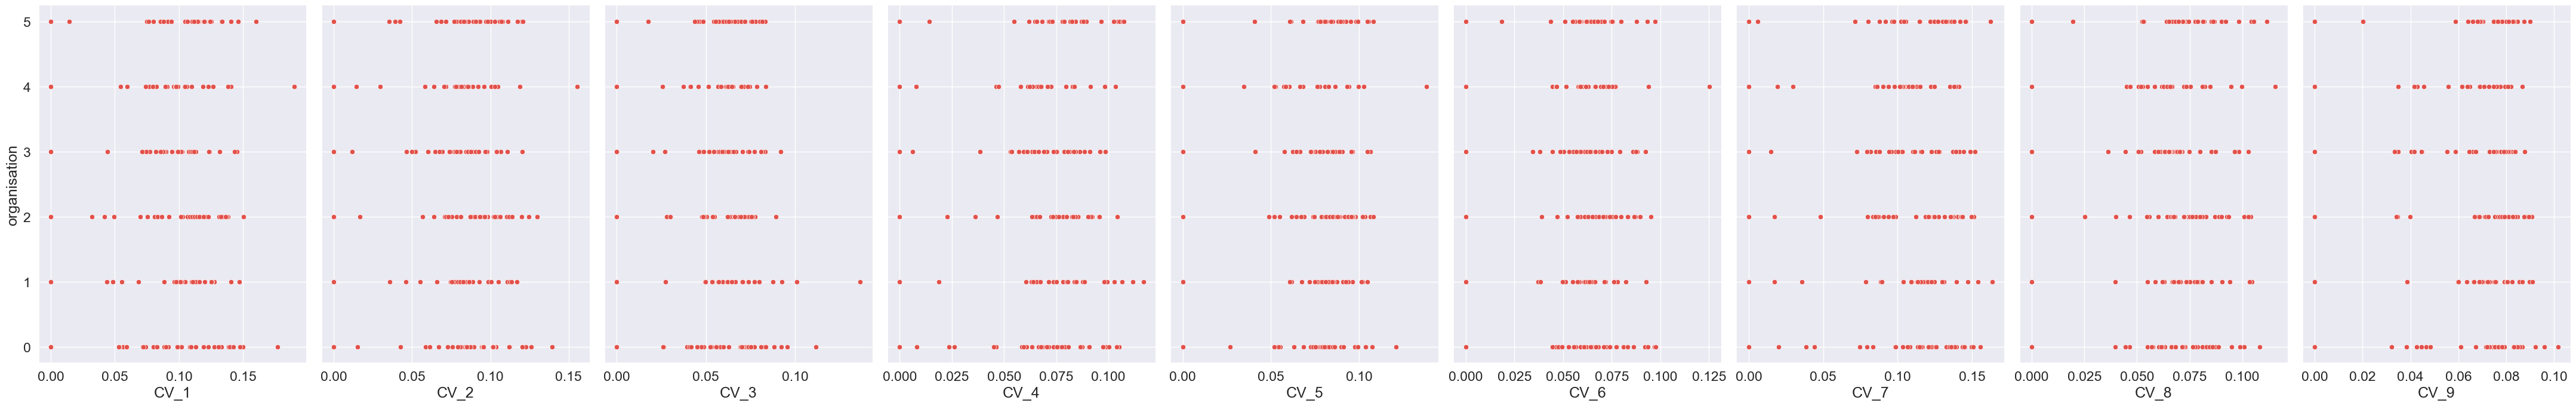

In [6]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad_data, x_vars=['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9'], y_vars='organisation', size=7, aspect=0.7)

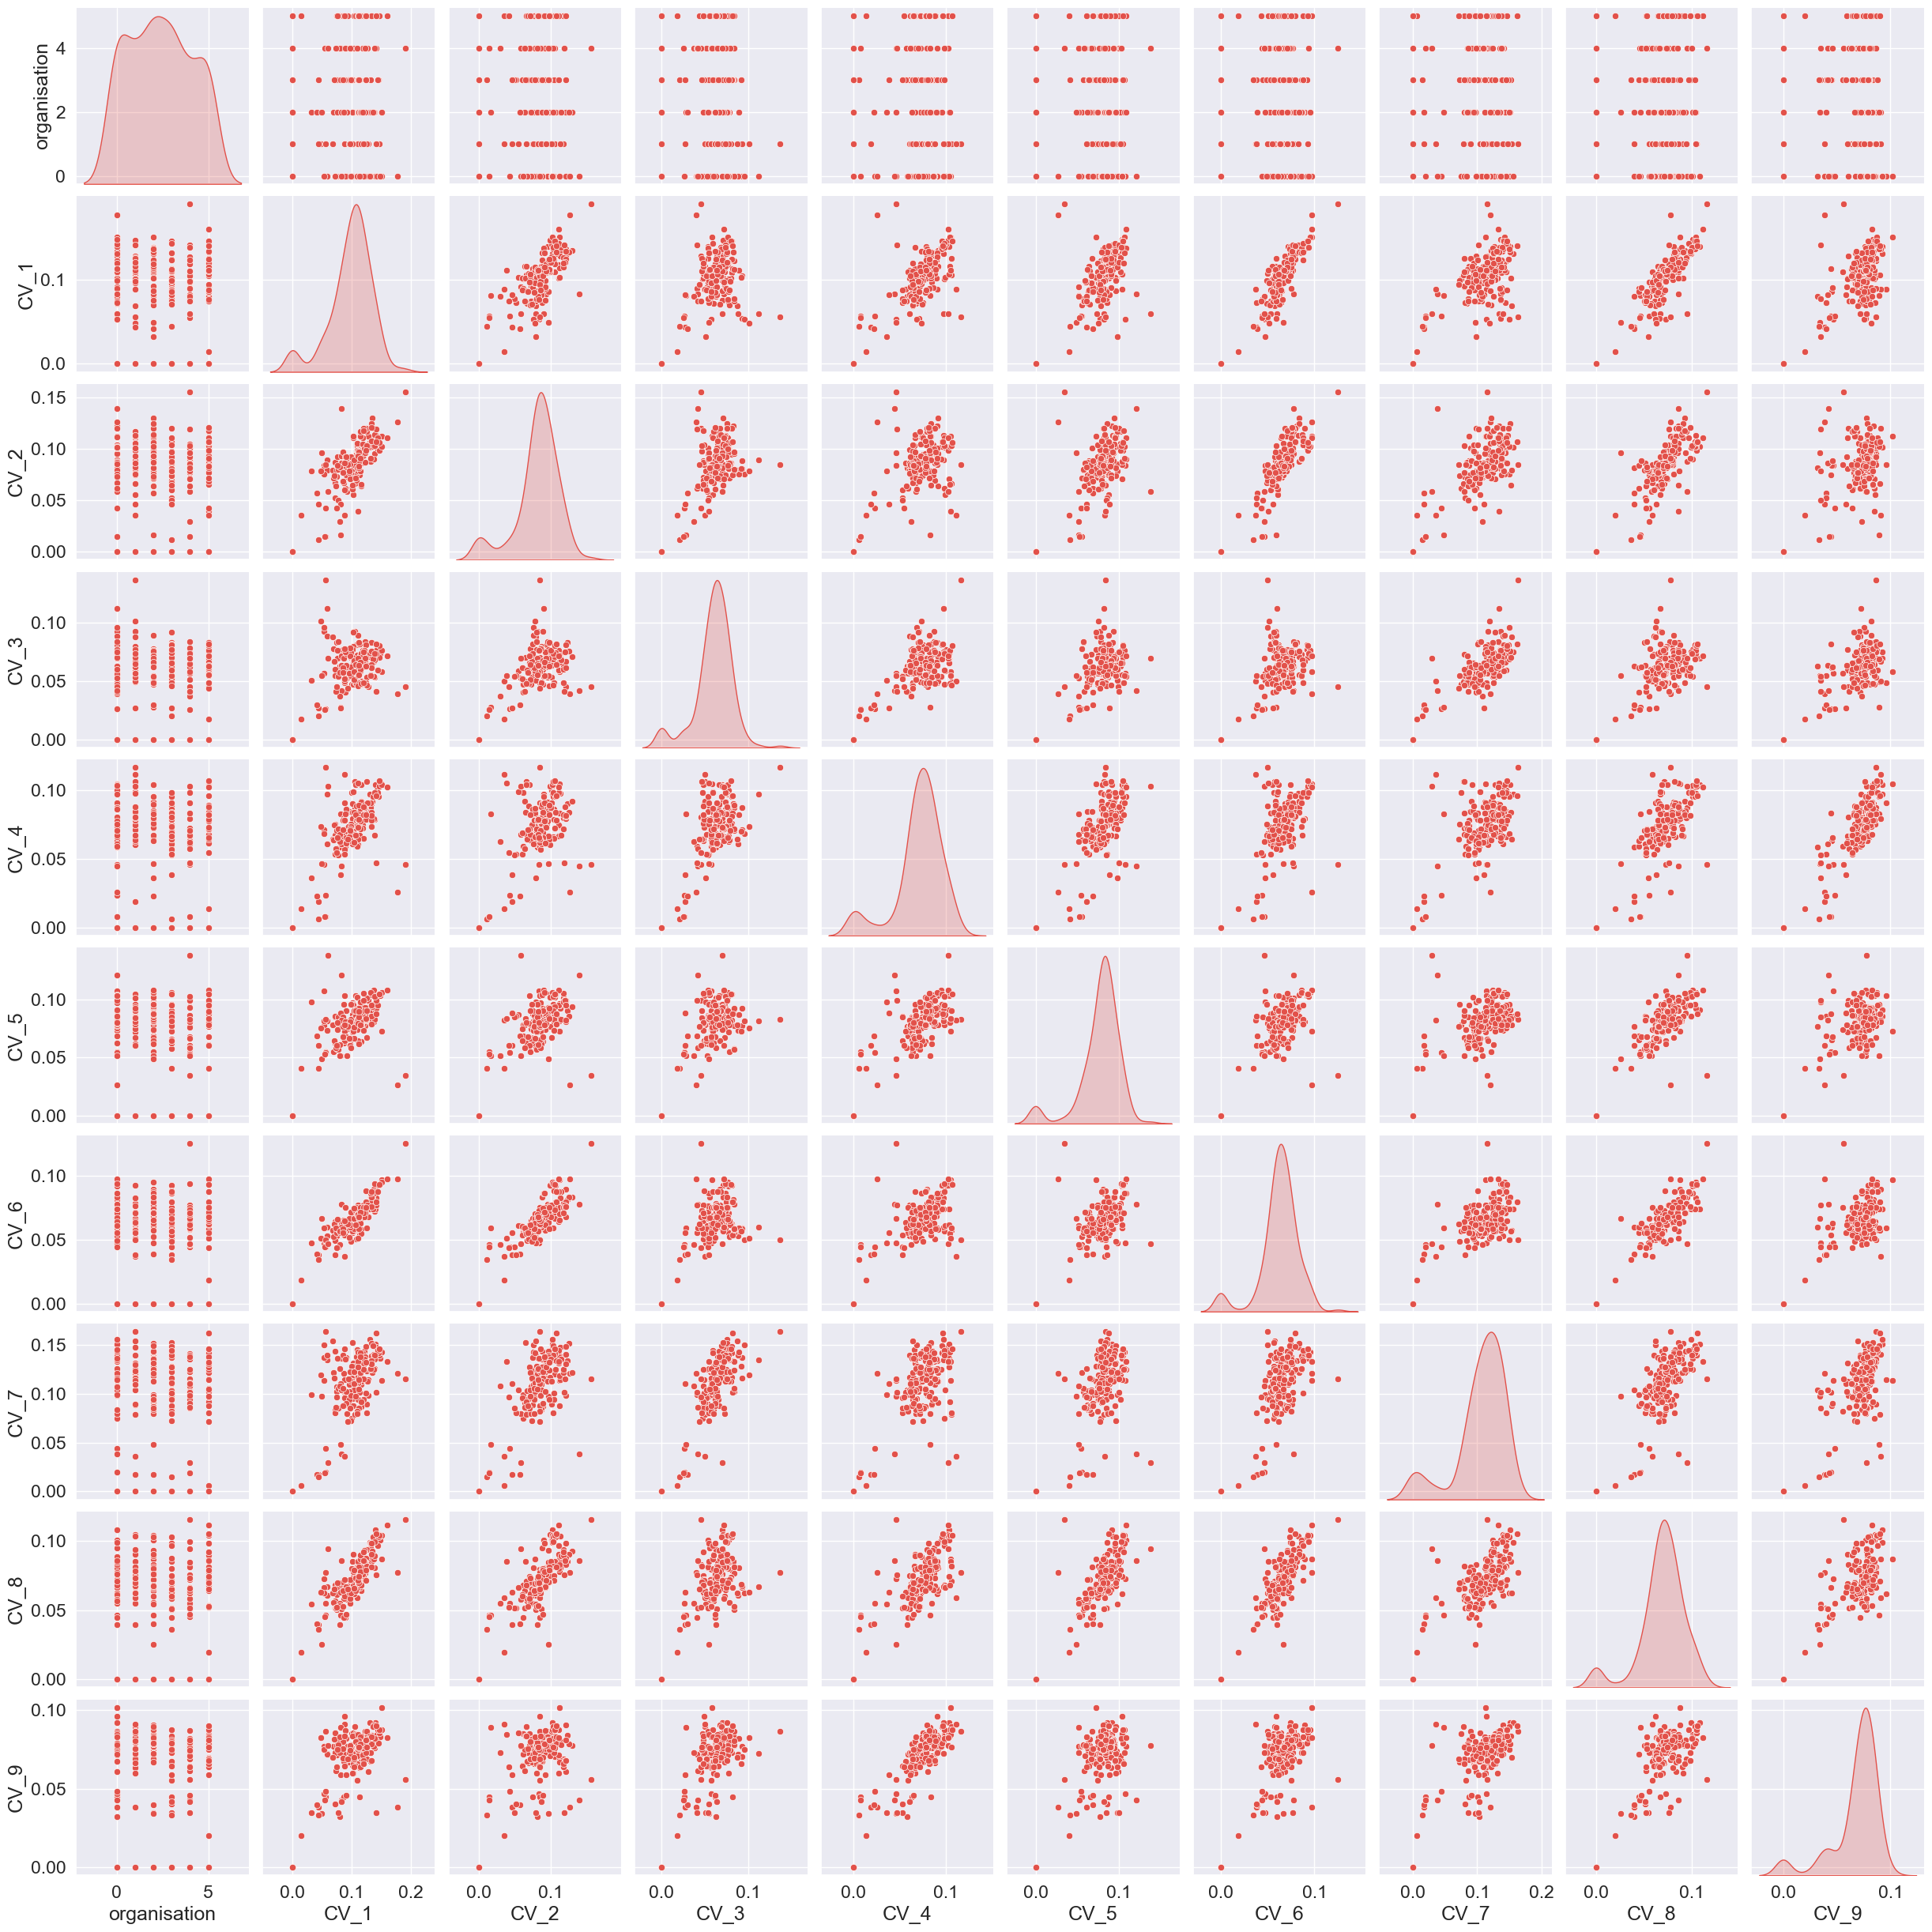

In [7]:
# Specifica la variabile dipendente (Y) e le variabili indipendenti (X)
variabile_dipendente = 'organisation'
variabili_indipendenti = ['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9']

# Crea un dataframe contenente solo le variabili di interesse
df_subset = ad_data[[variabile_dipendente] + variabili_indipendenti]

# Crea una matrice di scatterplot
p=sns.pairplot(df_subset, diag_kind='kde', markers='o')

In [8]:
ad_data = ad_data.dropna(subset=['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9', 'organisation'])

x = ad_data[['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9']]
y = ad_data.organisation

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)


In [12]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.039466103905554384


In [13]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -9.251858538542972e-17


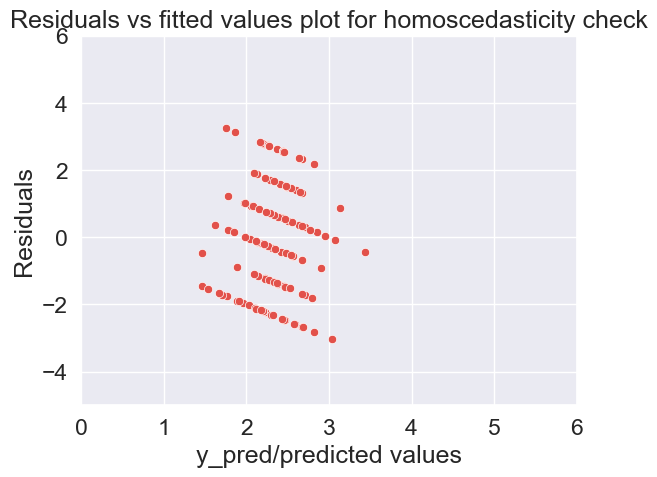

In [14]:
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-5,6)
plt.xlim(0,6)

p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [15]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.1630802664663125), ('p-value', 0.2752900177445299)]

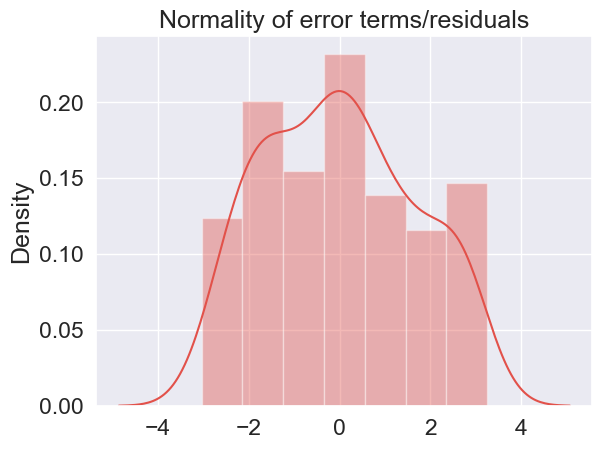

In [16]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

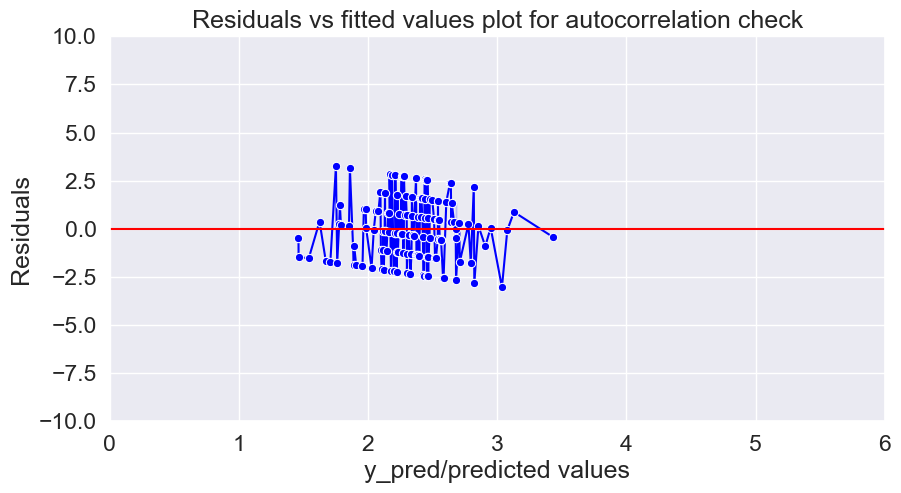

In [17]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,6)
p = sns.lineplot(x=[0,26],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [18]:
import statsmodels.api as sm

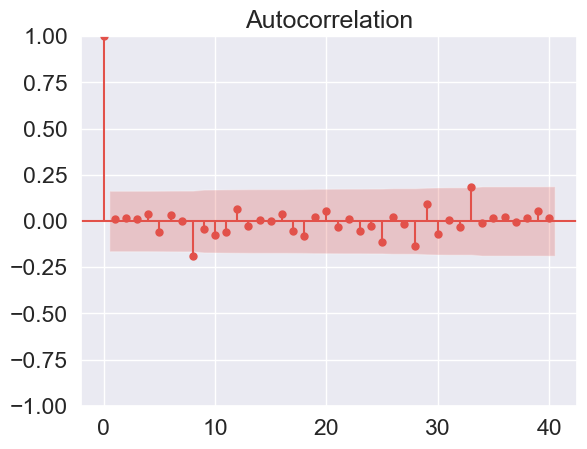

In [19]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

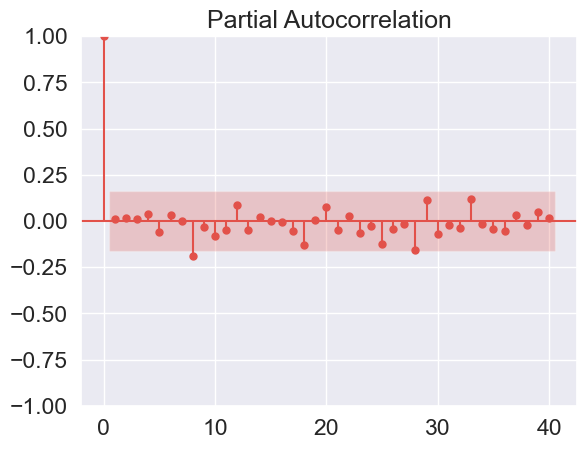

In [20]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

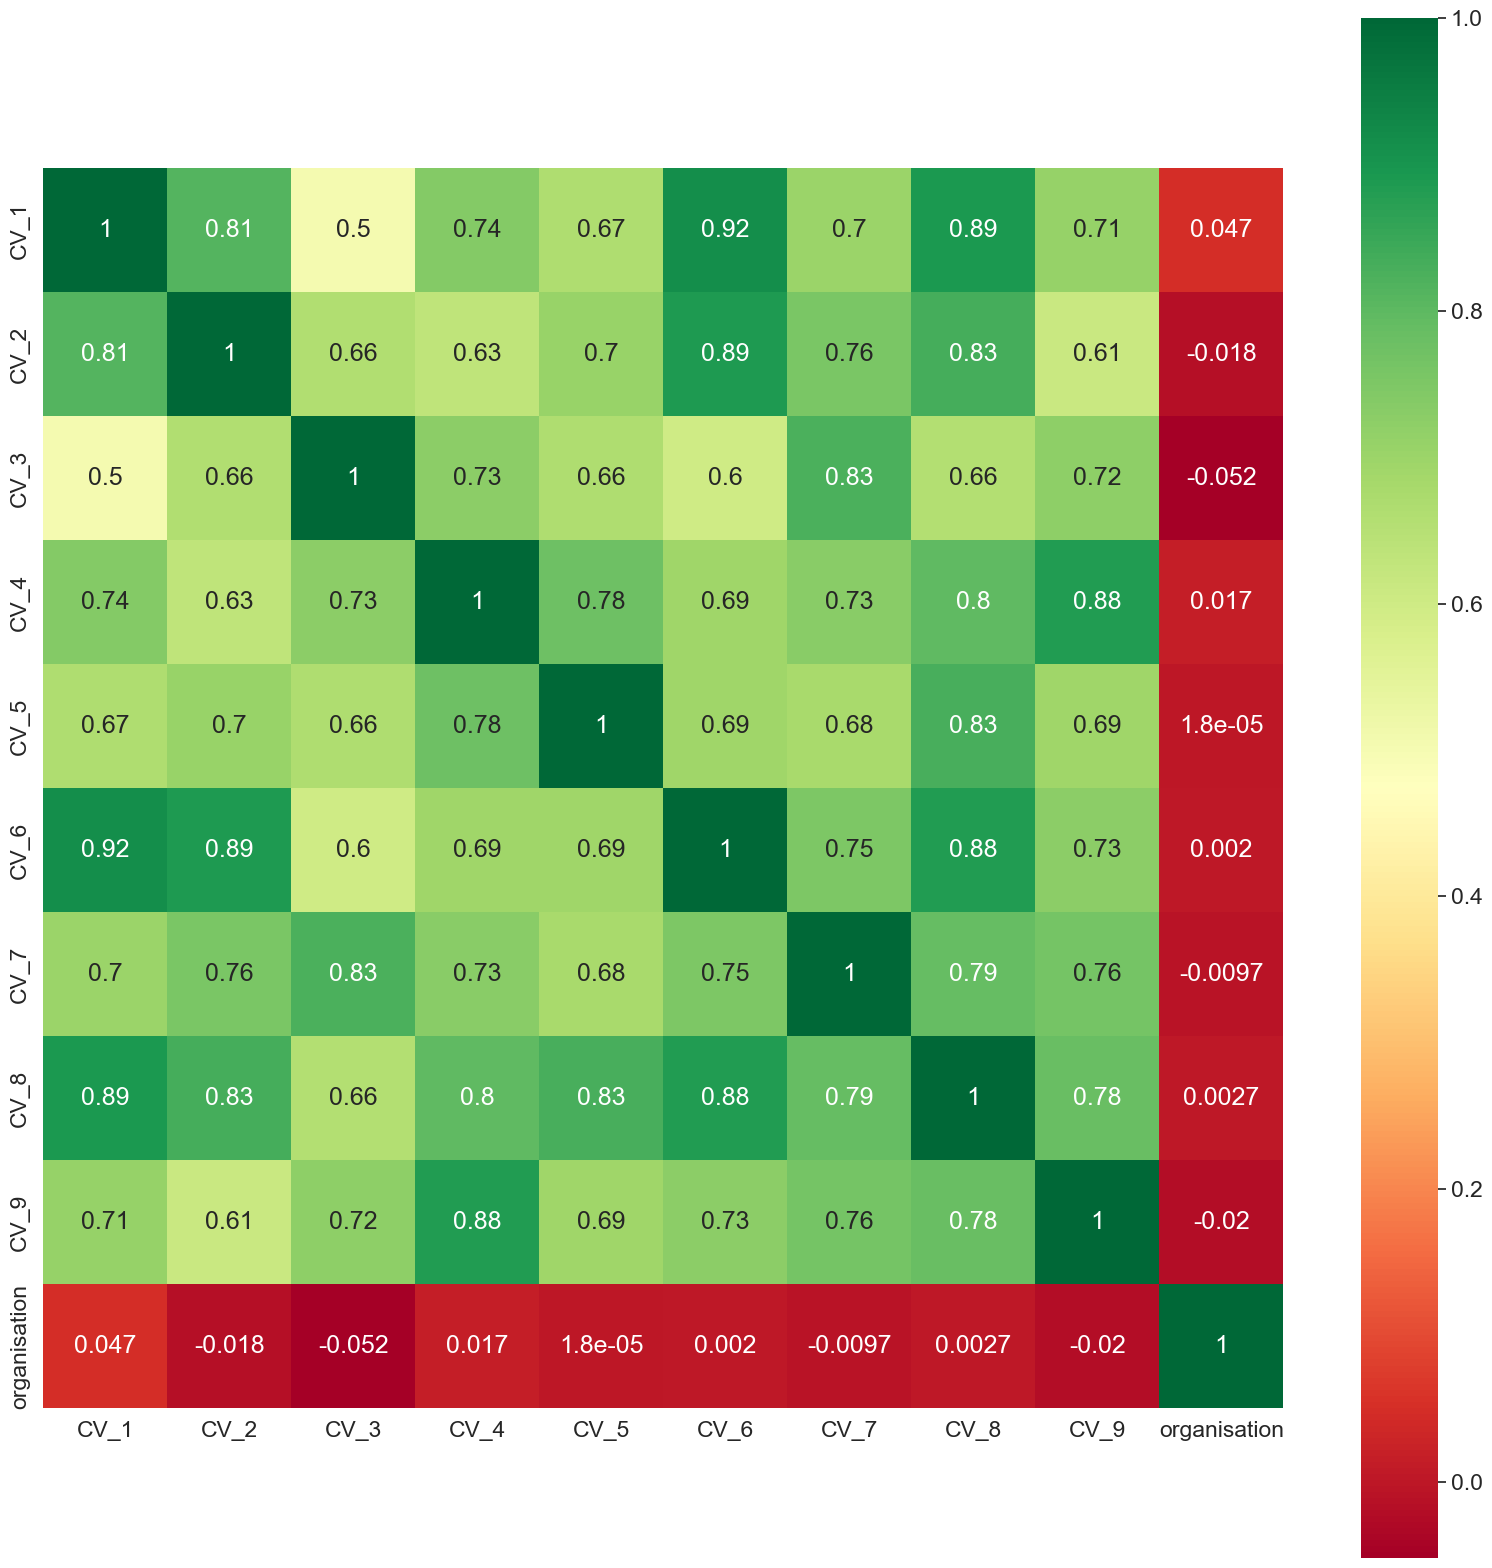

In [21]:
ad_data=ad_data[['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'CV_9','organisation']]
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [22]:
# Ora puoi ottenere i coefficienti della regressione
coefficients = regr.coef_
intercept = regr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.73567353 -0.28060914  0.10280388  0.09578764  0.1213321  -0.21591618
 -0.0447377  -0.21866696 -0.34415112]
Intercept: 2.3322102139024232


<h1>assunzioni hofstede</h1>

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [24]:
ad_data = pd.read_excel('C:\\Users\\saver\\PycharmProjects\\Community_smell\\organisation_silo\\organisation_silo_metrics_hofstede.xlsx')

In [25]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   row_id           192 non-null    int64  
 1   totalcommits     192 non-null    int64  
 2   project_id       192 non-null    int64  
 3   owner_login      192 non-null    object 
 4   language         192 non-null    object 
 5   created_at       192 non-null    object 
 6   windows          192 non-null    int64  
 7   window_idx       192 non-null    int64  
 8   name             192 non-null    object 
 9   team             192 non-null    object 
 10  genders          192 non-null    object 
 11  countries        192 non-null    object 
 12  blauGender       192 non-null    float64
 13  turnover         192 non-null    float64
 14  organisation     192 non-null    int64  
 15  tenureMedian     192 non-null    int64  
 16  tenureDiversity  192 non-null    int64  
 17  expertise       

In [26]:
ad_data.describe()

,row_id,totalcommits,project_id,windows,window_idx,blauGender,turnover,organisation,tenureMedian,tenureDiversity,...,CV_3,med_uai,dev_uai,CV_4,med_ltowvs,dev_ltowvs,CV_5,med_ivr,dev_ivr,CV_6
count,192.000000,192.000000,1.920000e+02,192.000000,192.000000,192.000000,192.000000,192.000000,192.00000,192.00000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,530378.265625,29342.760417,1.959214e+05,15.427083,10.286458,0.114130,0.412667,2.385417,2.56250,4.06250,...,0.228366,56.172800,16.433591,0.291999,43.634860,19.026599,0.437717,58.632159,13.872905,0.242513
std,267195.230745,36325.849493,7.671104e+05,6.502106,6.144527,0.092148,0.235172,1.708432,1.81219,2.52656,...,0.093450,6.852881,4.981340,0.083552,8.664962,5.559030,0.122217,5.427982,4.786526,0.093676
min,15064.000000,101.000000,1.000000e+01,2.000000,1.000000,0.013000,0.004000,0.000000,0.00000,0.00000,...,0.000000,41.600000,0.000000,0.000000,26.000000,0.000000,0.000000,40.000000,0.000000,0.000000
25%,211238.750000,4905.000000,1.226000e+03,11.500000,5.000000,0.056250,0.239750,1.000000,1.00000,2.00000,...,0.190169,52.168868,15.000344,0.284781,38.469459,17.792318,0.427448,55.330061,12.792503,0.206940
50%,559538.500000,16883.000000,3.231000e+03,15.000000,10.000000,0.091000,0.397000,2.000000,2.00000,4.00000,...,0.246587,55.568182,17.733337,0.317628,42.898558,20.082834,0.475632,59.271447,15.003922,0.252376
75%,778484.250000,25212.000000,1.491500e+04,24.000000,15.000000,0.142000,0.515000,4.000000,4.00000,6.00000,...,0.302091,58.705000,19.565616,0.337708,47.975000,22.320236,0.502045,62.236429,17.039236,0.304621
max,995109.000000,118673.000000,6.544729e+06,24.000000,24.000000,0.496000,1.000000,5.000000,5.00000,8.00000,...,0.369628,86.000000,23.008428,0.386609,83.000000,27.833323,0.584087,68.400000,21.245888,0.456200


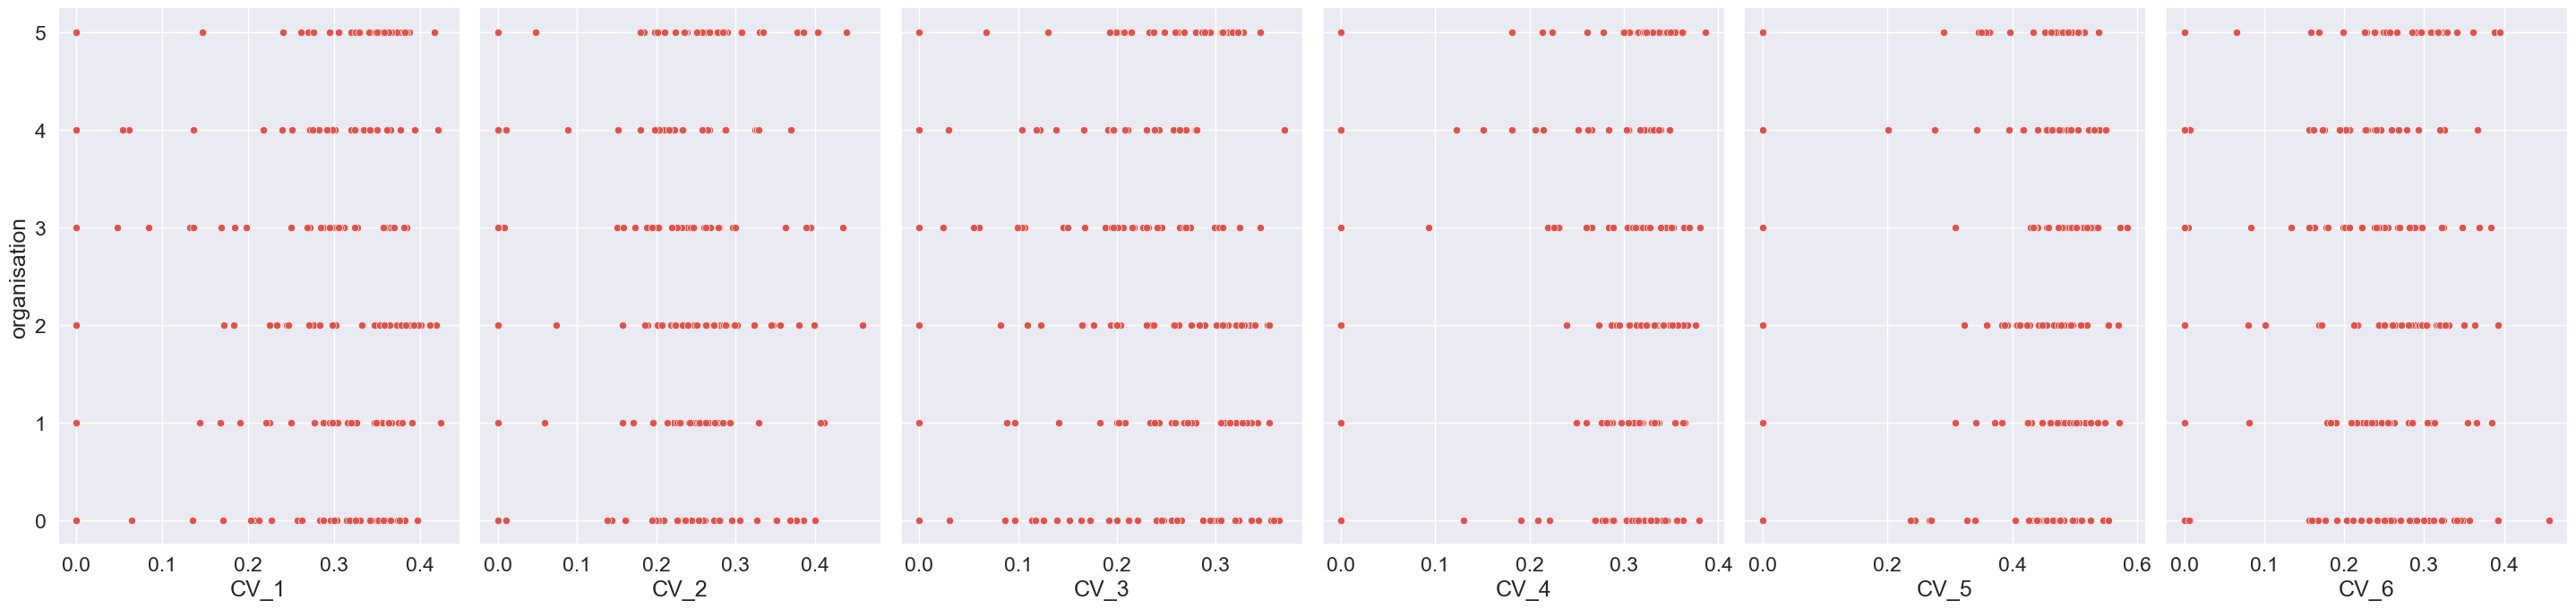

In [27]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad_data, x_vars=['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6'], y_vars='organisation', size=7, aspect=0.7)

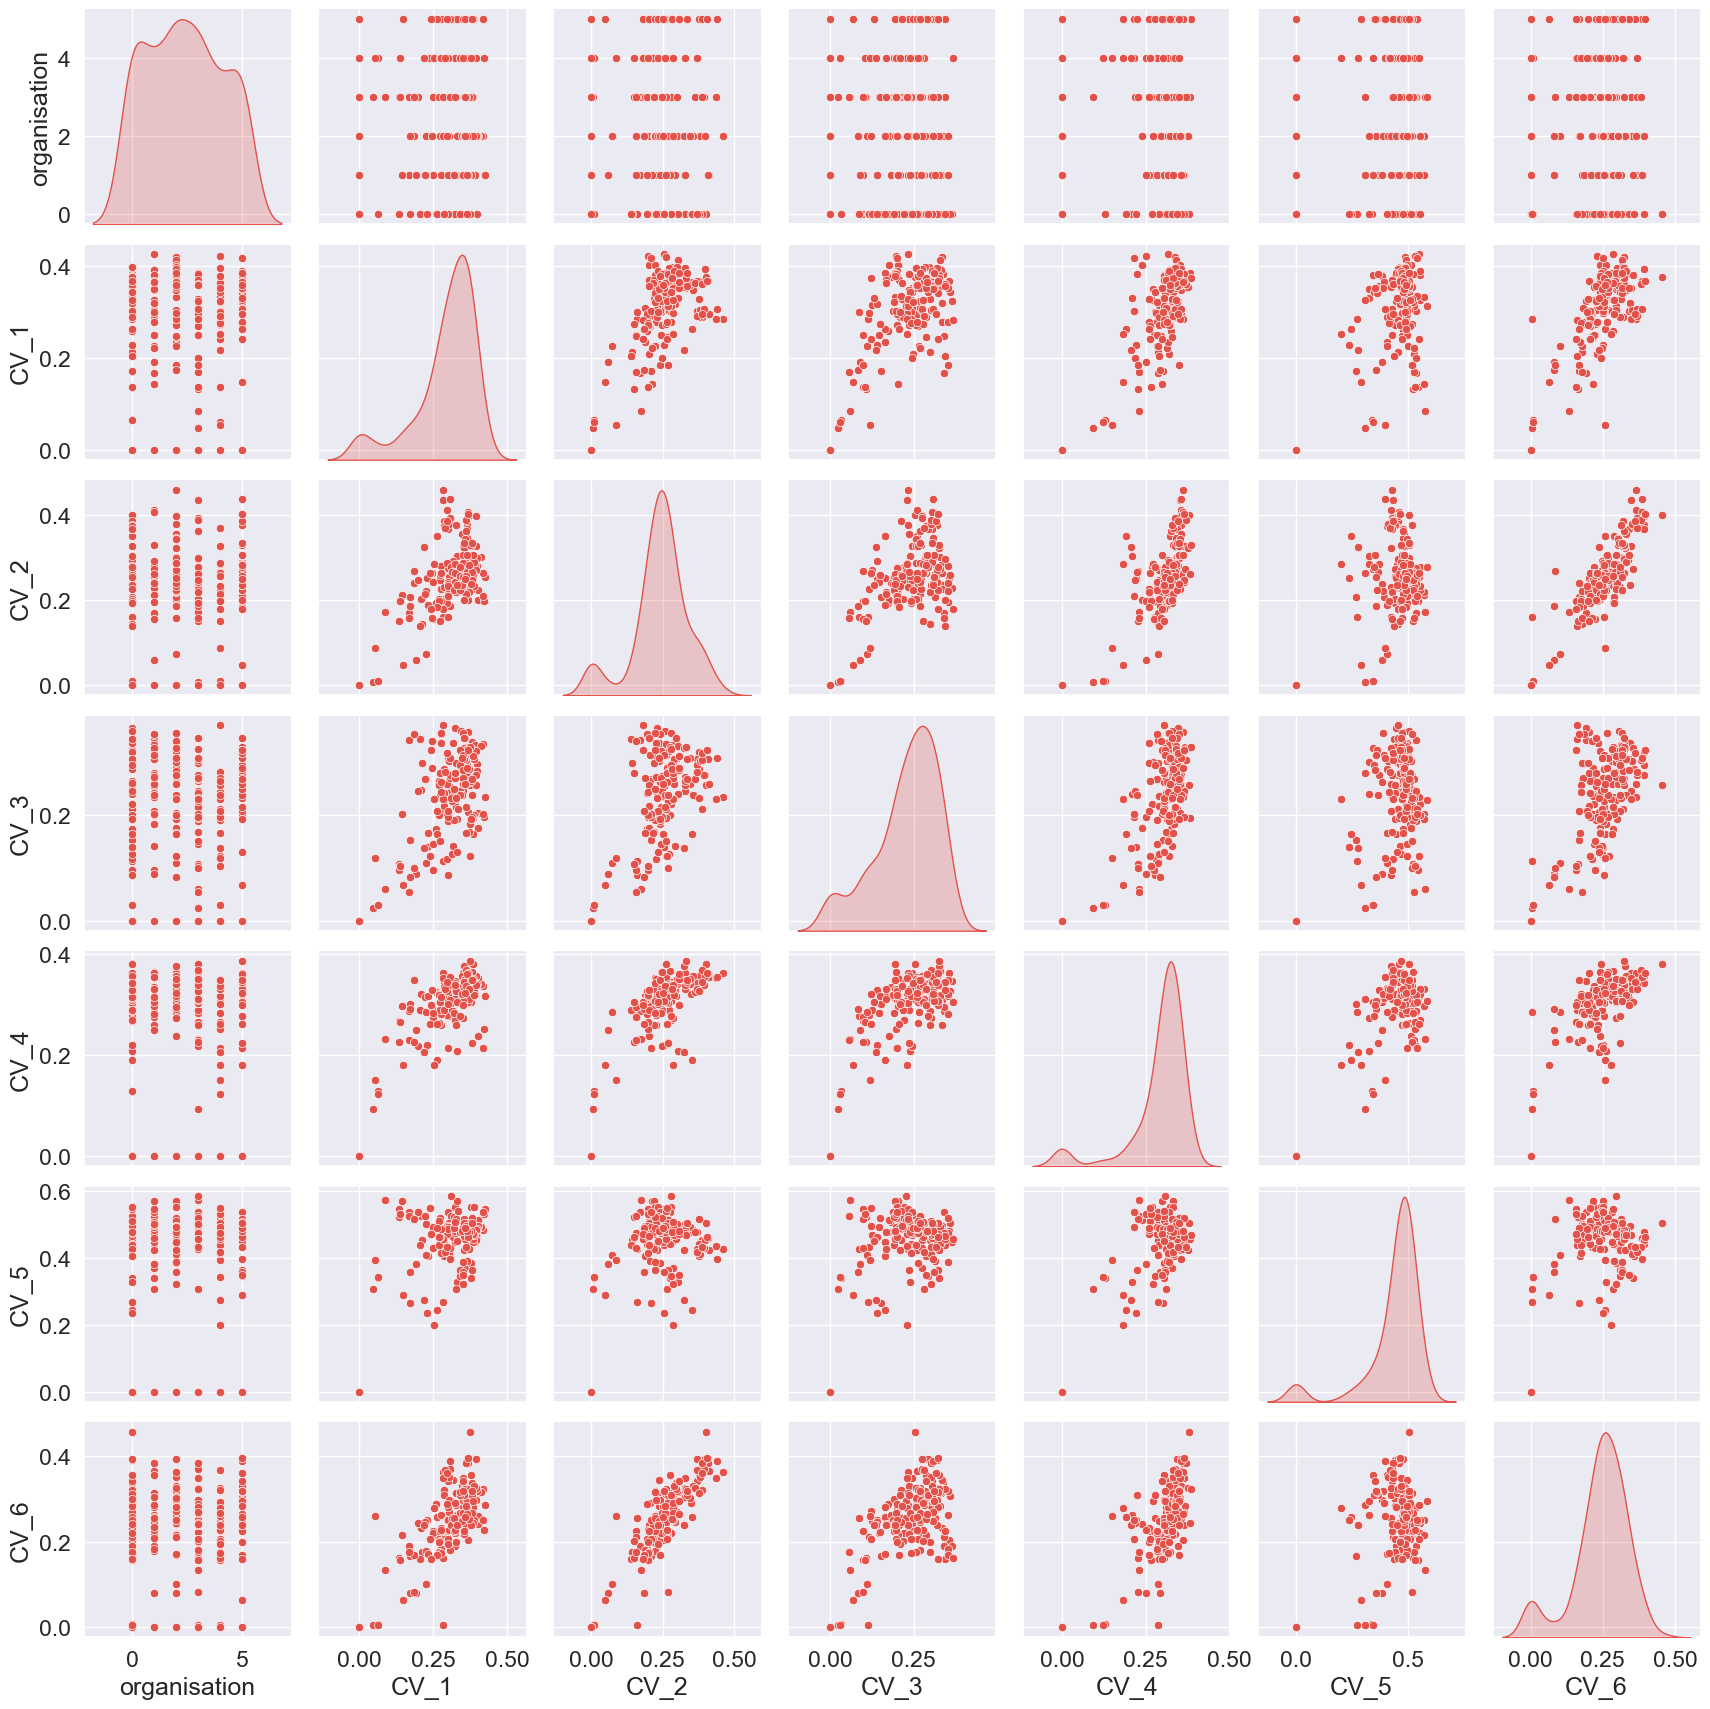

In [28]:
# Specifica la variabile dipendente (Y) e le variabili indipendenti (X)
variabile_dipendente = 'organisation'
variabili_indipendenti = ['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6']

# Crea un dataframe contenente solo le variabili di interesse
df_subset = ad_data[[variabile_dipendente] + variabili_indipendenti]

# Crea una matrice di scatterplot
p=sns.pairplot(df_subset, diag_kind='kde', markers='o')

In [29]:
ad_data = ad_data.dropna(subset=['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'organisation'])

x = ad_data[['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6']]
y = ad_data.organisation

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)


In [33]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.02739431428288719


In [34]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.7886926507849745e-16


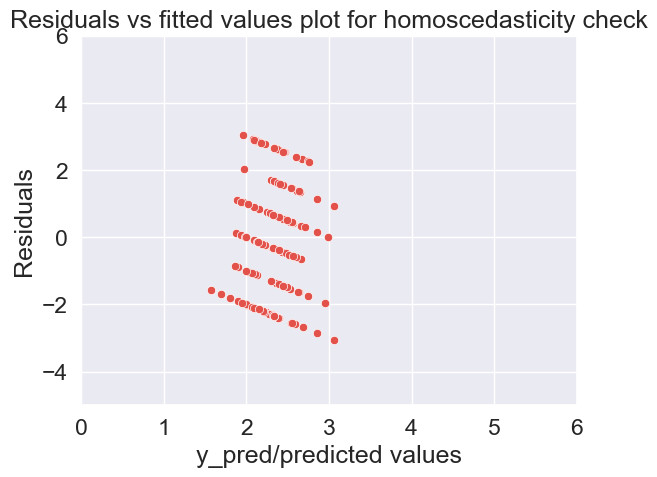

In [35]:
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-5,6)
plt.xlim(0,6)

p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [36]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.1540386847854), ('p-value', 0.2811227870267195)]

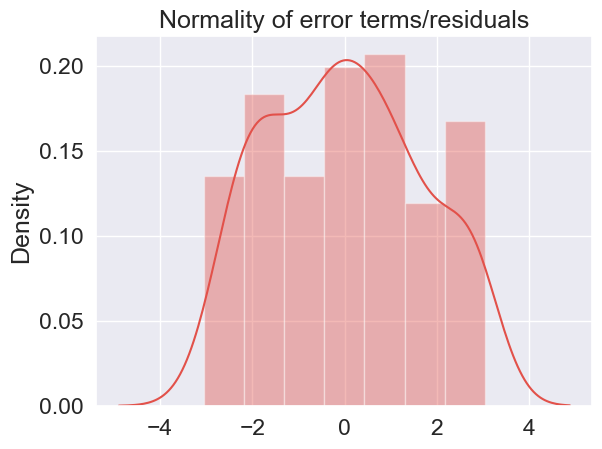

In [37]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

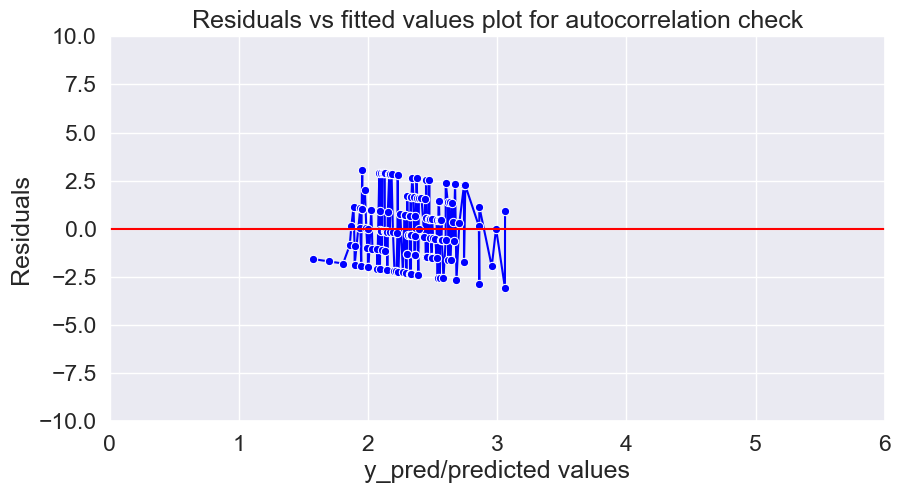

In [38]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,6)
p = sns.lineplot(x=[0,26],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

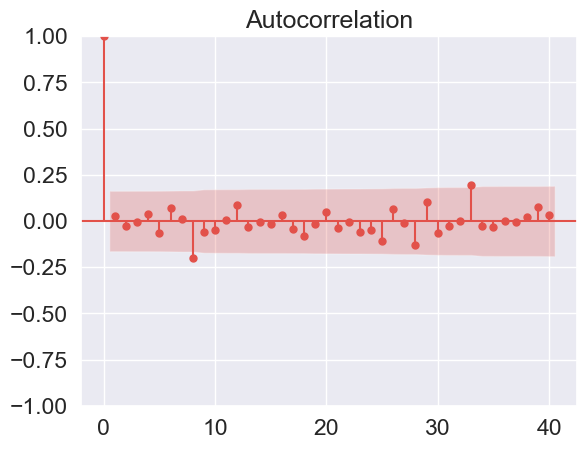

In [39]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

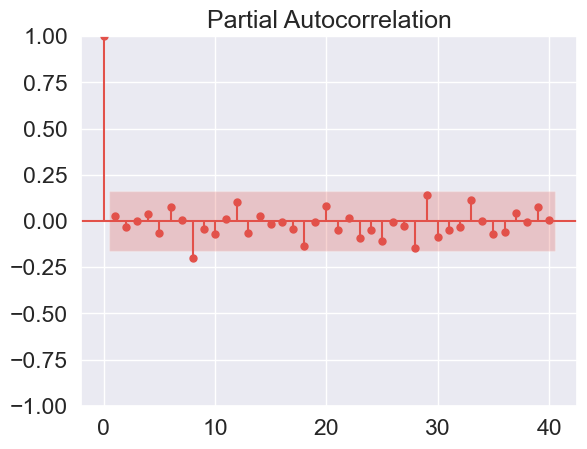

In [40]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

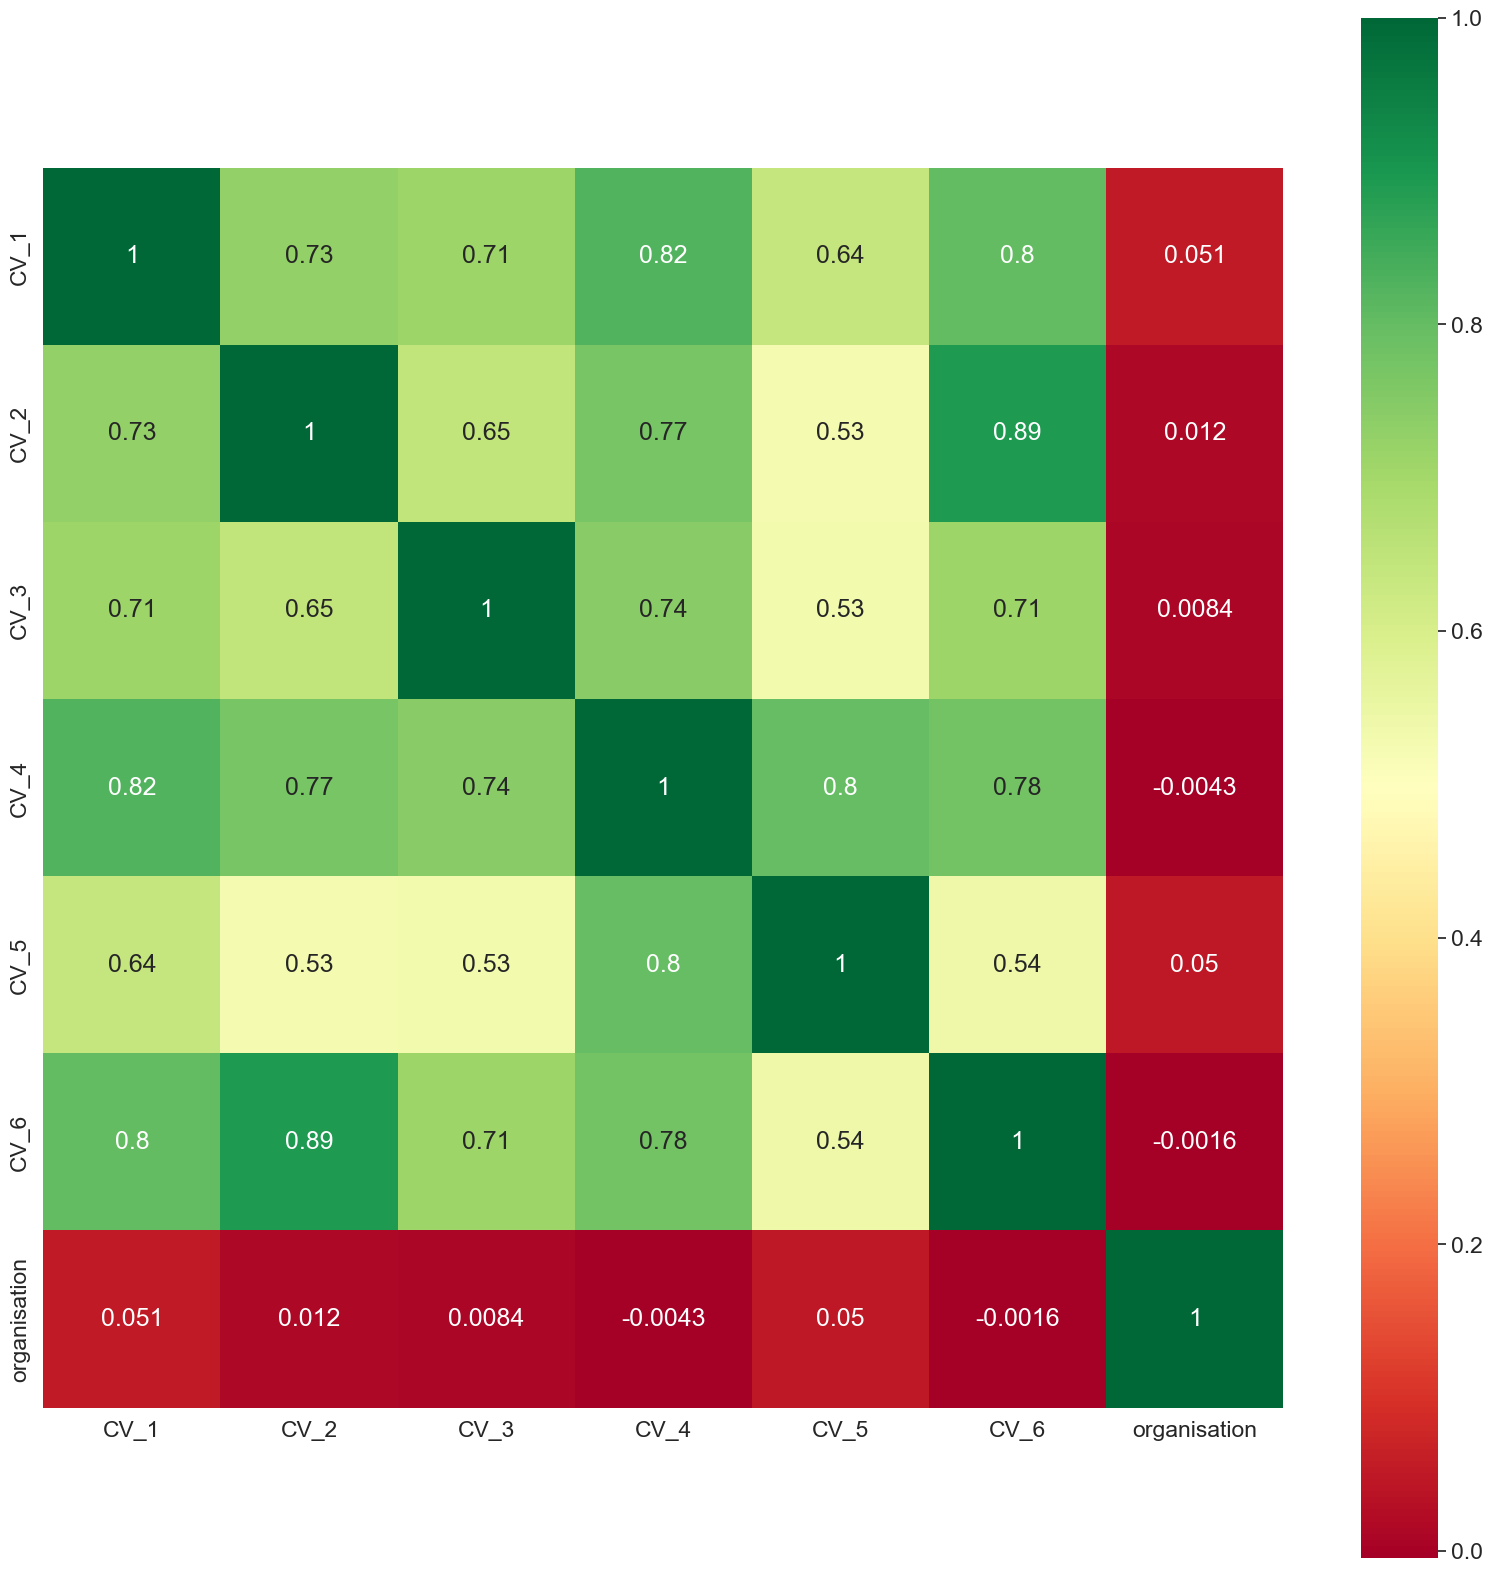

In [41]:
ad_data=ad_data[['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6','organisation']]
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [42]:
# Ora puoi ottenere i coefficienti della regressione
coefficients = regr.coef_
intercept = regr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.23024278  0.22708765  0.26247317 -0.59511022  0.31813418 -0.37547376]
Intercept: 2.3613075966591395


<h1>Assunzioni trompenaars</h1>

In [43]:
ad_data = pd.read_excel('C:\\Users\\saver\\PycharmProjects\\Community_smell\\organisation_silo\\organisation_silo_metrics_trompenaars.xlsx')
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   row_id                          192 non-null    int64  
 1   totalcommits                    192 non-null    int64  
 2   project_id                      192 non-null    int64  
 3   owner_login                     192 non-null    object 
 4   language                        192 non-null    object 
 5   created_at                      192 non-null    object 
 6   windows                         192 non-null    int64  
 7   window_idx                      192 non-null    int64  
 8   name                            192 non-null    object 
 9   team                            192 non-null    object 
 10  genders                         192 non-null    object 
 11  countries                       192 non-null    object 
 12  blauGender                      192 

In [44]:
ad_data.describe()

,row_id,totalcommits,project_id,windows,window_idx,blauGender,turnover,organisation,tenureMedian,tenureDiversity,...,CV_5,med_PPF,dev_PPF,CV_6,med_SS,dev_SS,CV_7,med_IE,dev_IE,CV_8
count,192.000000,192.000000,1.920000e+02,192.000000,192.000000,192.000000,192.000000,192.000000,192.00000,192.00000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,530378.265625,29342.760417,1.959214e+05,15.427083,10.286458,0.114130,0.412667,2.385417,2.56250,4.06250,...,0.332223,25.551688,16.538142,0.653925,67.088750,15.701911,0.239336,71.808136,22.839737,0.328905
std,267195.230745,36325.849493,7.671104e+05,6.502106,6.144527,0.092148,0.235172,1.708432,1.81219,2.52656,...,0.130560,7.343871,5.253987,0.183684,5.087585,6.268299,0.107158,9.928119,6.990906,0.117542
min,15064.000000,101.000000,1.000000e+01,2.000000,1.000000,0.013000,0.004000,0.000000,0.00000,0.00000,...,0.000000,13.500000,0.000000,0.000000,45.100000,0.000000,0.000000,37.000000,0.000000,0.000000
25%,211238.750000,4905.000000,1.226000e+03,11.500000,5.000000,0.056250,0.239750,1.000000,1.00000,2.00000,...,0.271416,21.208654,14.466513,0.603462,65.311944,12.941432,0.184794,65.787669,21.403598,0.291570
50%,559538.500000,16883.000000,3.231000e+03,15.000000,10.000000,0.091000,0.397000,2.000000,2.00000,4.00000,...,0.322953,24.269779,18.189260,0.696191,67.550287,17.164097,0.253681,71.530586,23.997298,0.344020
75%,778484.250000,25212.000000,1.491500e+04,24.000000,15.000000,0.142000,0.515000,4.000000,4.00000,6.00000,...,0.407134,28.547297,19.654083,0.762256,69.911805,19.892791,0.305246,77.795833,26.440824,0.380617
max,995109.000000,118673.000000,6.544729e+06,24.000000,24.000000,0.496000,1.000000,5.000000,5.00000,8.00000,...,0.578399,55.000000,25.448833,0.886824,93.000000,29.274295,0.617927,94.000000,34.409301,0.625019


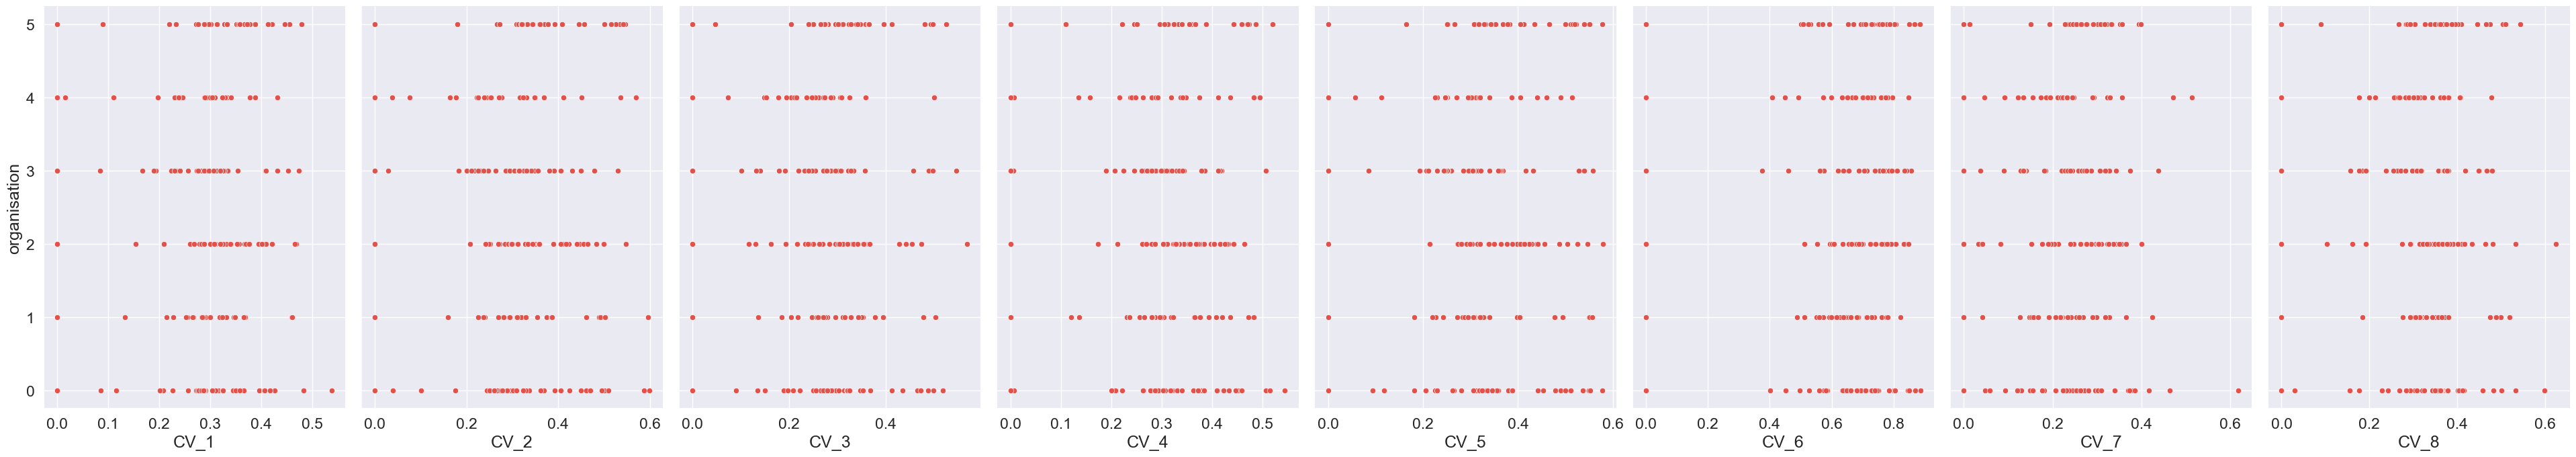

In [45]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(ad_data, x_vars=['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8'], y_vars='organisation', size=7, aspect=0.7)

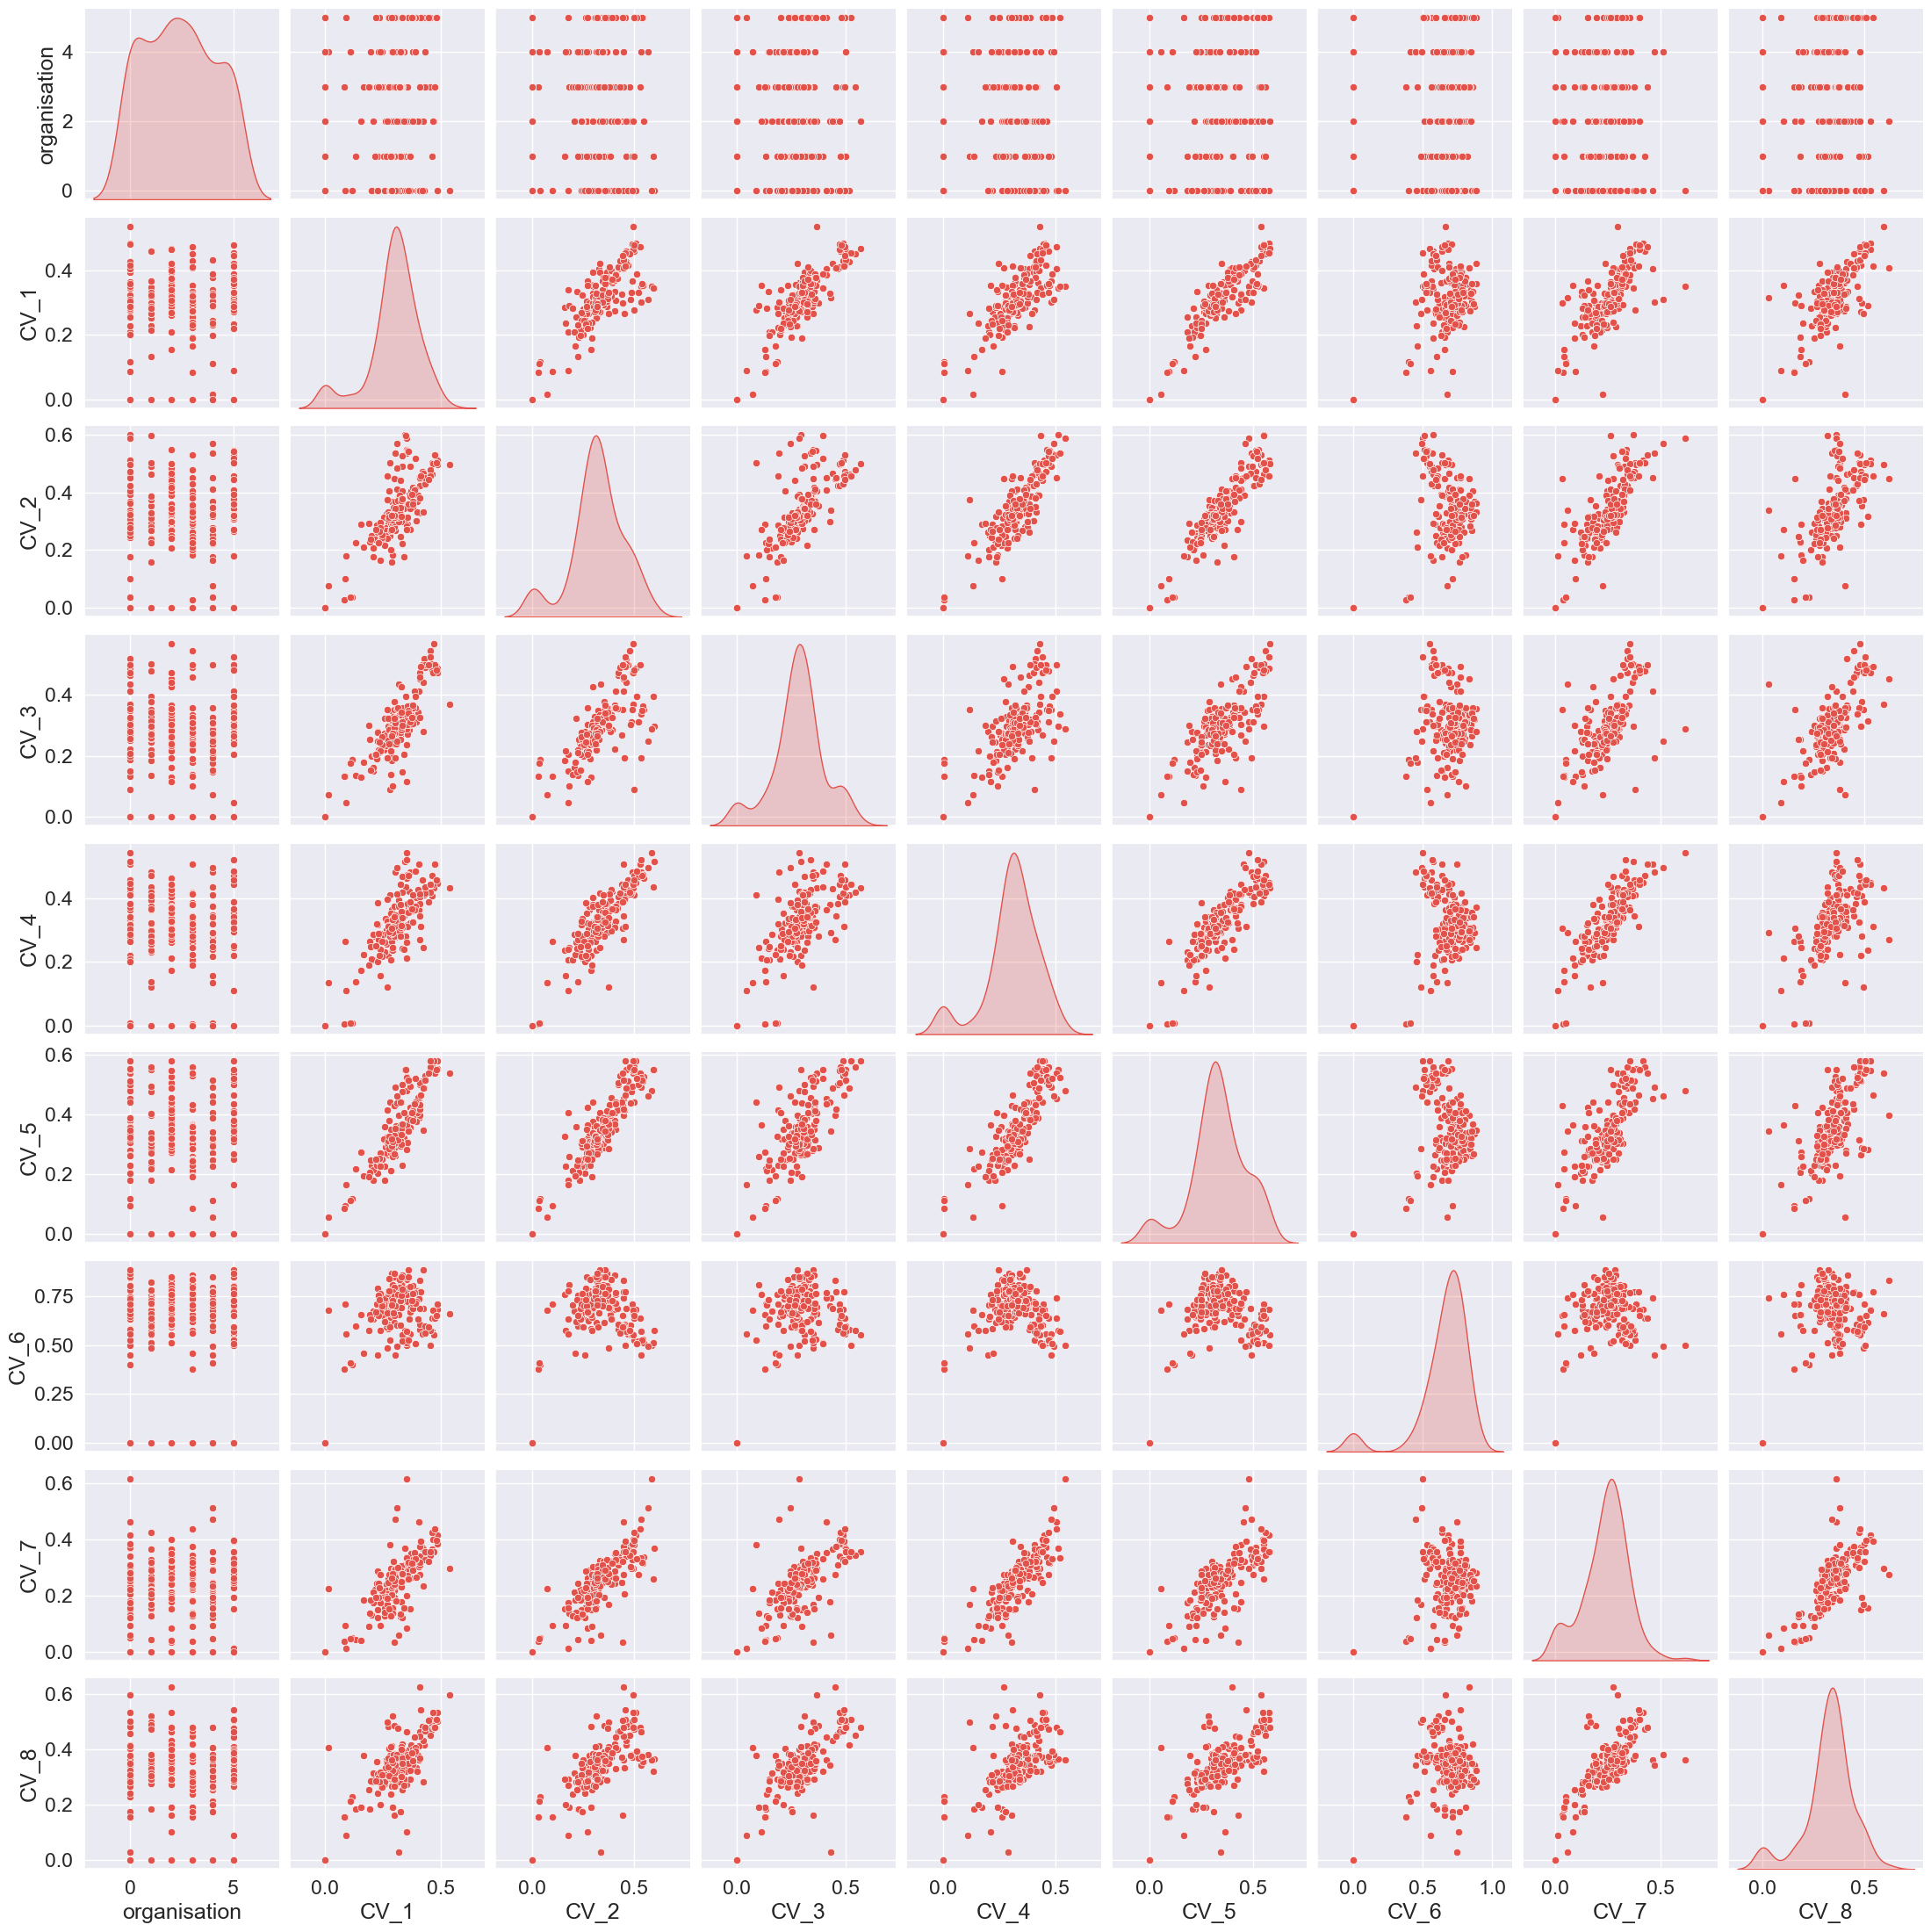

In [46]:
# Specifica la variabile dipendente (Y) e le variabili indipendenti (X)
variabile_dipendente = 'organisation'
variabili_indipendenti = ['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8']

# Crea un dataframe contenente solo le variabili di interesse
df_subset = ad_data[[variabile_dipendente] + variabili_indipendenti]

# Crea una matrice di scatterplot
p=sns.pairplot(df_subset, diag_kind='kde', markers='o')

In [47]:
ad_data = ad_data.dropna(subset=['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8', 'organisation'])

x = ad_data[['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8']]
y = ad_data.organisation

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)


In [51]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.05182210889288663


In [52]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.9737298215558337e-16


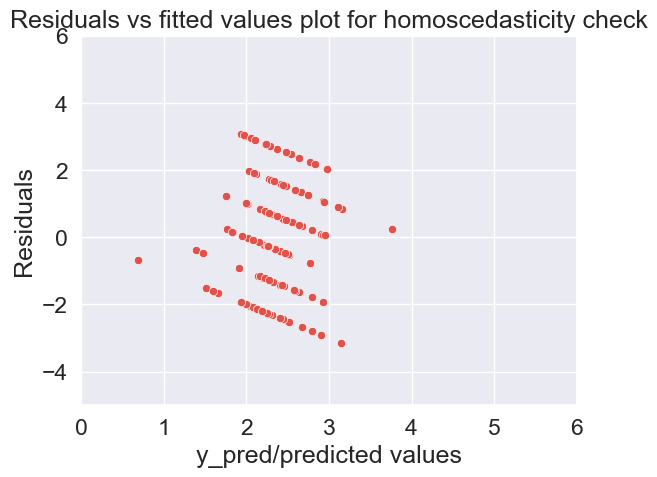

In [61]:
p = sns.scatterplot(x=y_pred,y=residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-5,6)
plt.xlim(0,6)

p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [54]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.0194879056546802), ('p-value', 0.4693514579620675)]

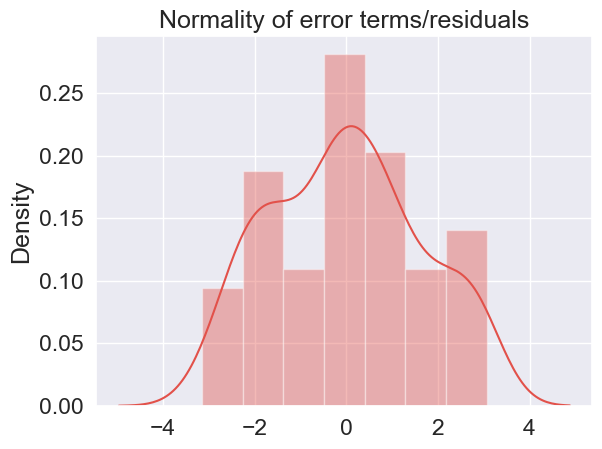

In [55]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

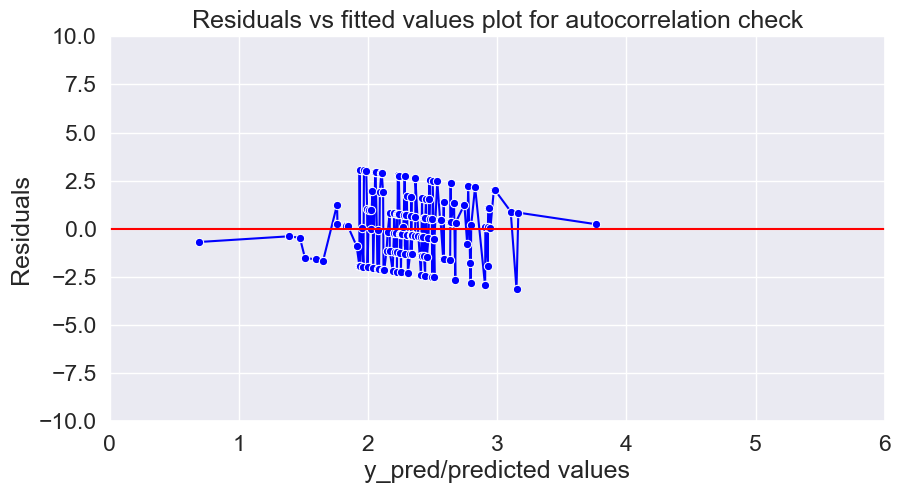

In [56]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,6)
p = sns.lineplot(x=[0,26],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

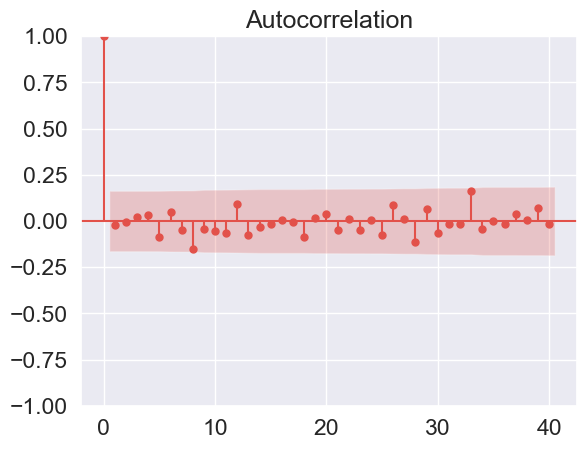

In [57]:
import statsmodels.api as sm
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

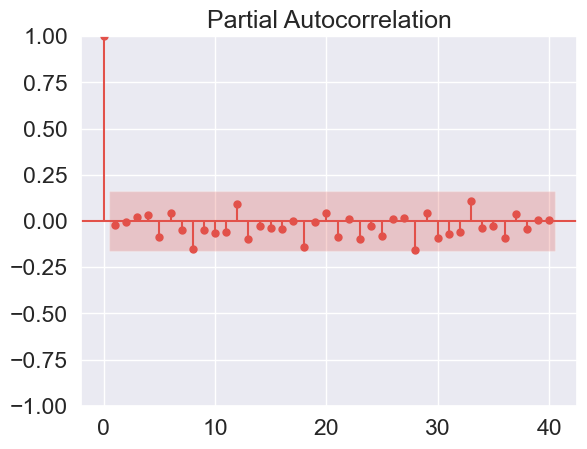

In [58]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

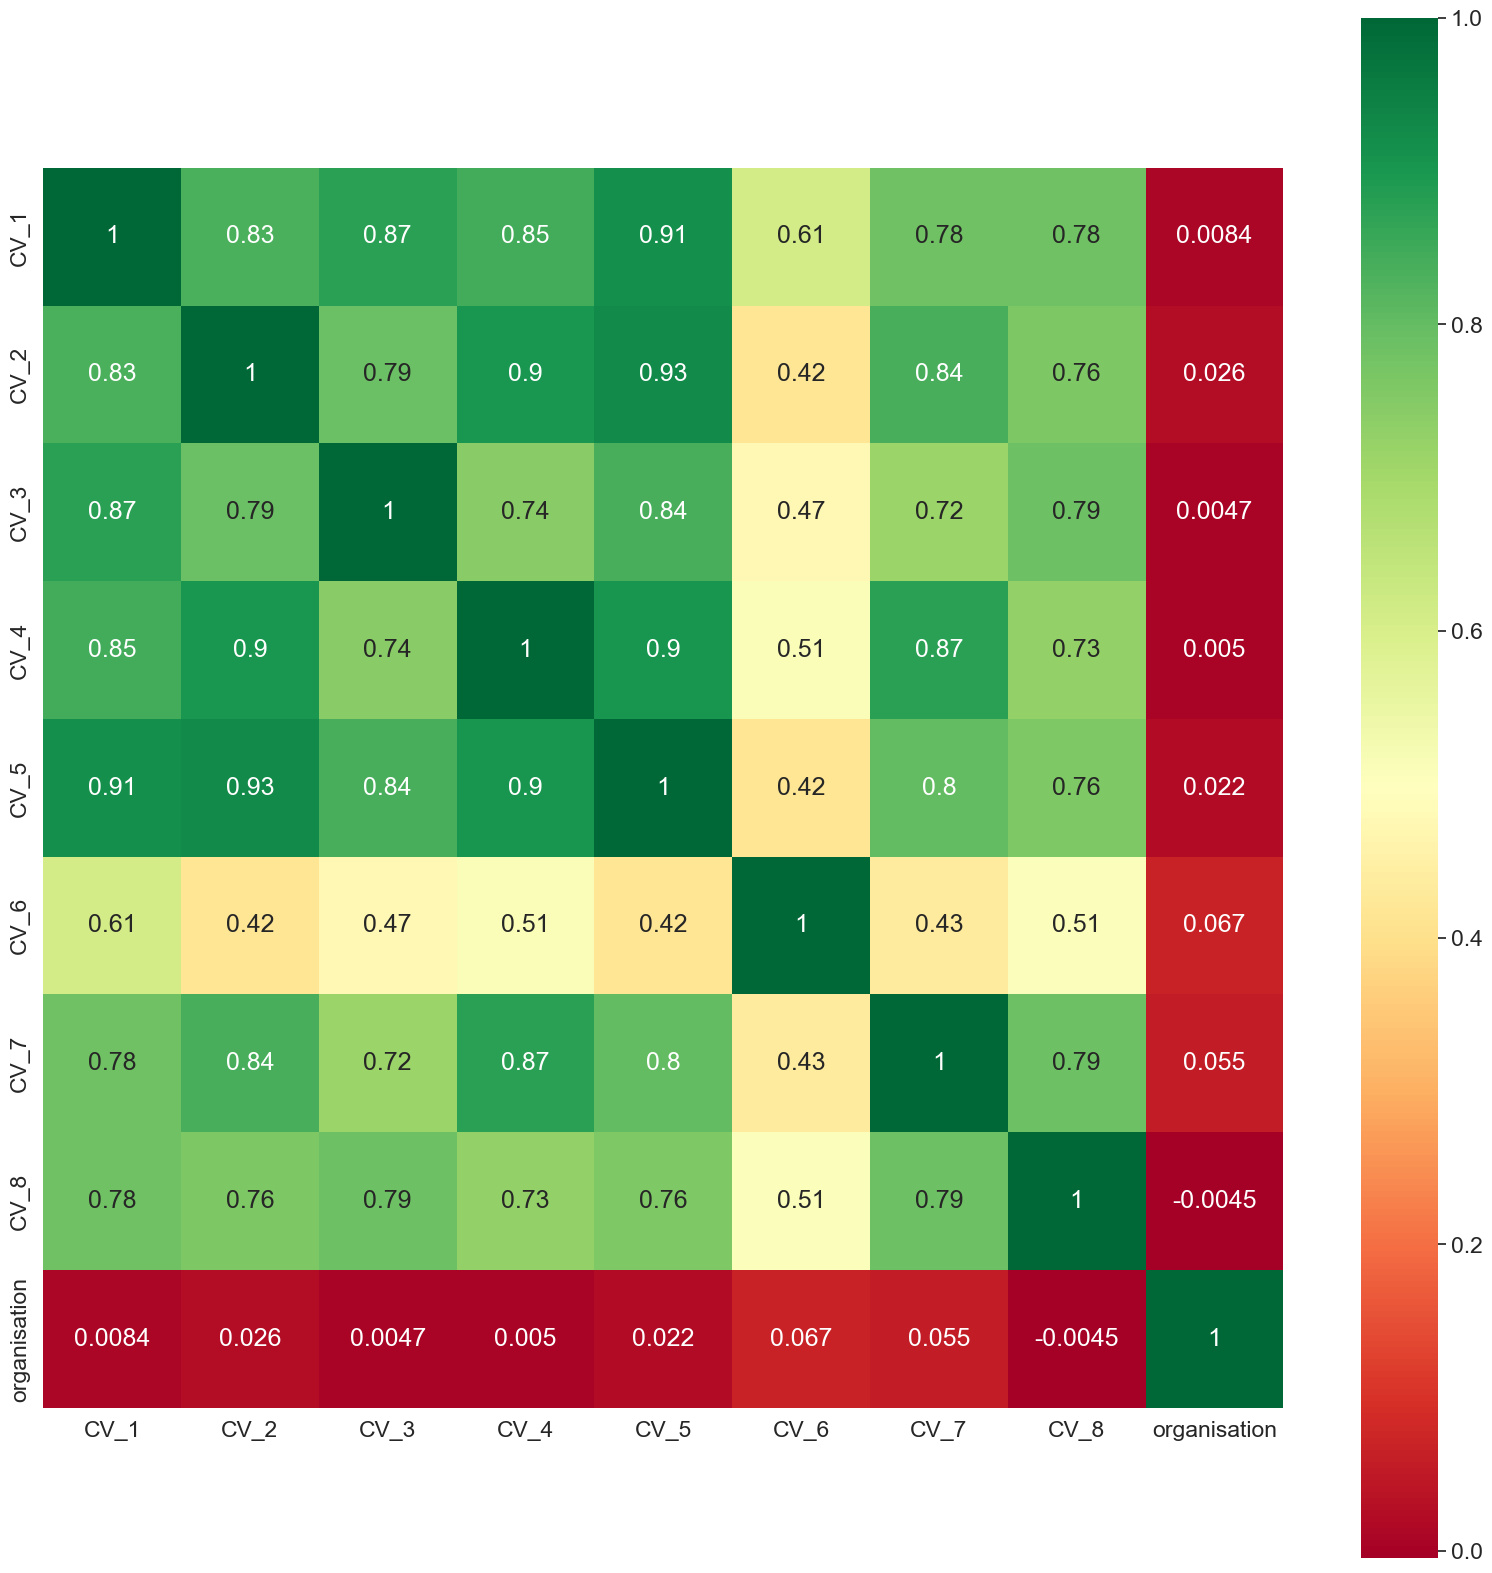

In [59]:
ad_data=ad_data[['CV_1', 'CV_2', 'CV_3', 'CV_4', 'CV_5', 'CV_6', 'CV_7', 'CV_8','organisation']]
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

In [60]:
# Ora puoi ottenere i coefficienti della regressione
coefficients = regr.coef_
intercept = regr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.95807546 -0.41596702  0.0905894  -0.57380342  1.13939339  0.36618544
  0.68126255 -0.22469513]
Intercept: 2.317238623178049
